In [3]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.datasets import fetch_california_housing, load_iris, load_wine, load_boston
from sklearn.model_selection import cross_val_score, ParameterSampler
from scipy.stats.distributions import uniform, randint
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

sns.set(style="whitegrid")

In [4]:
data = fetch_california_housing()
x = pd.DataFrame(data['data'])
y = pd.DataFrame(data['target'])

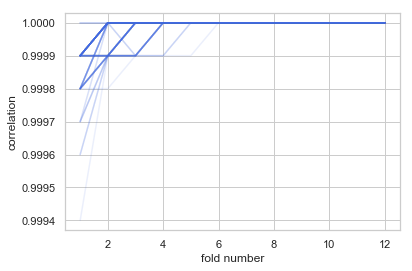

In [5]:
for i in tqdm_notebook(range(100)):
    
    #shuffle data
    x = x.sample(n=x.shape[0], random_state=i)
    y = y.loc[x.index]
    
    params_distribution = {'n_estimators': randint(2,100),
                           'max_depth': randint(2,200),
                           'learning_rate': uniform(.001, .2),
                           'colsample_bytree': uniform(.5, 0.5),
                           'num_leaves': randint(2,100)}

    ps = ParameterSampler(params_distribution, 100, random_state=i)
    model = LGBMRegressor()
    cross_val_scores_list = []

    for params in ps:

        model.set_params(**params)

        cross_val_scores = cross_val_score(model, x, y, cv=8, scoring='neg_mean_squared_error')
        cross_val_scores_list.append(cross_val_scores)

    scores_array = np.array(cross_val_scores_list)
    scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(12)]
    scores_cumulative = np.array(scores_cumulative)

    corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4))

    ax = sns.lineplot(x=range(1,13), y=corrs.iloc[:,-1], color='royalblue', alpha=0.1)
    ax.set(xlabel='fold number', ylabel='correlation')

In [6]:
wine = load_wine()
x_wine = pd.DataFrame(wine['data'])
y_wine = pd.Series(wine['target'])

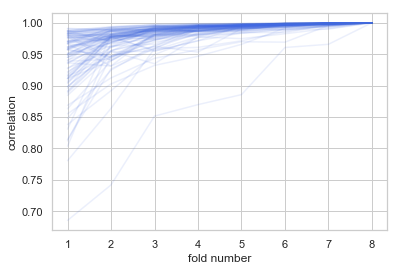

In [7]:
for i in tqdm_notebook(range(100)):
    
    
    #shuffle data
    x_wine = x_wine.sample(n=x_wine.shape[0], random_state=i)
    y_wine = y_wine.loc[x_wine.index]

    params_distribution = {'n_estimators': randint(2,100),
                           'max_depth': randint(2,200),
                           'learning_rate': uniform(.001, .2),
                           'colsample_bytree': uniform(.5, 0.5),
                           'num_leaves': randint(2,100)}

    ps = ParameterSampler(params_distribution, 100, random_state=i)
    model = LGBMClassifier()
    cross_val_scores_list = []

    for params in ps:

        model.set_params(**params)

        cross_val_scores = cross_val_score(model, x_wine, y_wine, cv=8, scoring='neg_mean_squared_error')
        cross_val_scores_list.append(cross_val_scores)

    scores_array = np.array(cross_val_scores_list)
    scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(8)]
    scores_cumulative = np.array(scores_cumulative)

    corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4), 
                         columns=[i for i in range(1,9)], 
                         index=[i for i in range(1,9)])

    ax = sns.lineplot(x=range(1,9), y=corrs.iloc[:,-1], color='royalblue', alpha=0.1)
    ax.set(xlabel='fold number', ylabel='correlation')

In [8]:
boston = load_boston()

x_boston = pd.DataFrame(boston['data'])
y_boston = pd.Series(boston['target'])

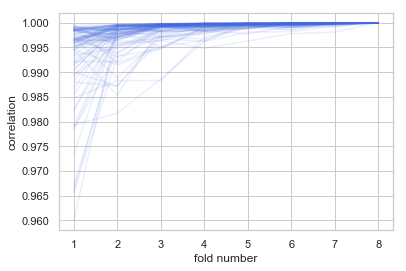

In [9]:
for i in tqdm_notebook(range(100)):
    
    #shuffle data
    x_boston = x_boston.sample(n=x_boston.shape[0], random_state=i)
    y_boston = y_boston.loc[x_boston.index]

    params_distribution = {'n_estimators': randint(2,100),
                           'max_depth': randint(2,200),
                           'learning_rate': uniform(.001, .2),
                           'colsample_bytree': uniform(.5, 0.5),
                           'num_leaves': randint(2,100)}

    ps = ParameterSampler(params_distribution, 100, random_state=i)
    model = LGBMRegressor()
    cross_val_scores_list = []

    for params in ps:

        model.set_params(**params)

        cross_val_scores = cross_val_score(model, x_boston, y_boston, cv=8, scoring='neg_mean_squared_error')
        cross_val_scores_list.append(cross_val_scores)

    scores_array = np.array(cross_val_scores_list)
    scores_cumulative = [scores_array[:,:i+1].mean(axis=1) for i in range(8)]
    scores_cumulative = np.array(scores_cumulative)

    corrs = pd.DataFrame(np.corrcoef(scores_cumulative).round(4), 
                         columns=[i for i in range(1,9)], 
                         index=[i for i in range(1,9)])

    ax = sns.lineplot(x=range(1,9), y=corrs.iloc[:,-1], color='royalblue', alpha=0.1)
    ax.set(xlabel='fold number', ylabel='correlation')